# Drug Review Analysis

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
train_data = pd.read_csv('drugLib_raw/drugLibTrain_raw.tsv', sep='\t', header=0, names=['id', 'drug', 'rating', 'effectiveness', 'side_effects', 'condition', 'benefits_review', 'side_effects_review', 'comments_review'])
train_data.head()

,id,drug,rating,effectiveness,side_effects,condition,benefits_review,side_effects_review,comments_review
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   3107 non-null   int64 
 1   drug                 3107 non-null   object
 2   rating               3107 non-null   int64 
 3   effectiveness        3107 non-null   object
 4   side_effects         3107 non-null   object
 5   condition            3106 non-null   object
 6   benefits_review      3107 non-null   object
 7   side_effects_review  3105 non-null   object
 8   comments_review      3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [5]:
train_data.drop(columns='id', inplace=True)
train_data.head()

,drug,rating,effectiveness,side_effects,condition,benefits_review,side_effects_review,comments_review
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [6]:
train_data.isna().any()

drug                   False
rating                 False
effectiveness          False
side_effects           False
condition               True
benefits_review        False
side_effects_review     True
comments_review         True
dtype: bool

In [86]:
train_data[train_data.isna().any(axis=1)]

,drug,rating,effectiveness,side_effects,condition,benefits_review,side_effects_review,comments_review
147,doxycycline,4,Moderately Effective,Severe Side Effects,epididymitus,Treatment cleared up the infection.,Treatment ended 2 months ago and have still go...,NaN
400,hyzaar,8,Highly Effective,Moderate Side Effects,hypertension,Pills helped to lower my blood pressure. Also...,"Back pain, especially after a missed dose. In...",NaN
407,ritalin-la,8,Considerably Effective,Mild Side Effects,adhd,This medication enabled me to think clearly. ...,"This medication caused me to be nervous, tremb...",NaN
1238,seasonique,9,Highly Effective,Mild Side Effects,prevent menstral migranes,Experienced 1 migrane in the past year since o...,Noticed light skin iritation. Take the light ...,NaN
1468,seasonique,4,Considerably Effective,Moderate Side Effects,preventing pregnancy,preventing pregnancy,This pill was great b/c i didn't have any peri...,NaN
1965,xenical,3,Marginally Effective,No Side Effects,over weight,i have been on xenical for a little over 2 wee...,i dont have any other then now i am constipated,NaN
2402,levothroid,10,Highly Effective,No Side Effects,thyroid,balancing of thyroid back to normal range. Pri...,NaN,.1mg daily orally.
2488,keflex,2,Ineffective,No Side Effects,NaN,None. I had a bacterial infection accompanyin...,The only good point I suppose is that there wa...,Absoutely innefective. I easily could have be...
2705,flonase,8,Considerably Effective,No Side Effects,plugged up nose related to seasonal allergies,cleared up nose,none,NaN
2891,doxycycline,6,Moderately Effective,No Side Effects,acne,Controlled acne breakouts to some extent when ...,NaN,Took Doxylin 50 mg once daily for 3 months. I...


In [84]:
train_data[train_data.isna().any(axis=1)].shape

(11, 8)

In [88]:
train_data.fillna({'side_effects_review': 'no side effects'}, inplace=True)
train_data[train_data.isna().any(axis=1)].shape

(9, 8)

In [93]:
train_data[train_data.isna().any(axis=1)]

,drug,rating,effectiveness,side_effects,condition,benefits_review,side_effects_review,comments_review
147,doxycycline,4,Moderately Effective,Severe Side Effects,epididymitus,Treatment cleared up the infection.,Treatment ended 2 months ago and have still go...,NaN
400,hyzaar,8,Highly Effective,Moderate Side Effects,hypertension,Pills helped to lower my blood pressure. Also...,"Back pain, especially after a missed dose. In...",NaN
407,ritalin-la,8,Considerably Effective,Mild Side Effects,adhd,This medication enabled me to think clearly. ...,"This medication caused me to be nervous, tremb...",NaN
1238,seasonique,9,Highly Effective,Mild Side Effects,prevent menstral migranes,Experienced 1 migrane in the past year since o...,Noticed light skin iritation. Take the light ...,NaN
1468,seasonique,4,Considerably Effective,Moderate Side Effects,preventing pregnancy,preventing pregnancy,This pill was great b/c i didn't have any peri...,NaN
1965,xenical,3,Marginally Effective,No Side Effects,over weight,i have been on xenical for a little over 2 wee...,i dont have any other then now i am constipated,NaN
2488,keflex,2,Ineffective,No Side Effects,NaN,None. I had a bacterial infection accompanyin...,The only good point I suppose is that there wa...,Absoutely innefective. I easily could have be...
2705,flonase,8,Considerably Effective,No Side Effects,plugged up nose related to seasonal allergies,cleared up nose,none,NaN
2921,ceclor,1,Ineffective,Severe Side Effects,ear infection,My son had an allergic reaction. He broke out...,Time - let them go away on their own,NaN


In [90]:
train_data_benefits = train_data[['rating', 'benefits_review', 'effectiveness']].copy()
train_data_side_effects = train_data[['rating', 'side_effects_review' ,'side_effects']].copy()

In [91]:
train_data_benefits

,rating,benefits_review,effectiveness
0,4,slowed the progression of left ventricular dys...,Highly Effective
1,1,Although this type of birth control has more c...,Highly Effective
2,10,I was used to having cramps so badly that they...,Highly Effective
3,3,The acid reflux went away for a few months aft...,Marginally Effective
4,2,I think that the Lyrica was starting to help w...,Marginally Effective
...,...,...,...
3102,10,"Increased focus, attention, productivity. Bett...",Highly Effective
3103,1,Emotions were somewhat blunted. Less moodiness.,Ineffective
3104,2,---,Marginally Effective
3105,8,Controlled complex partial seizures.,Considerably Effective


In [92]:
train_data_side_effects

,rating,side_effects_review,side_effects
0,4,"cough, hypotension , proteinuria, impotence , ...",Mild Side Effects
1,1,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...",Severe Side Effects
2,10,Heavier bleeding and clotting than normal.,No Side Effects
3,3,"Constipation, dry mouth and some mild dizzines...",Mild Side Effects
4,2,I felt extremely drugged and dopey. Could not...,Severe Side Effects
...,...,...,...
3102,10,"Restless legs at night, insomnia, headache (so...",Mild Side Effects
3103,1,"Weight gain, extreme tiredness during the day,...",Extremely Severe Side Effects
3104,2,Constant issues with the patch not staying on....,Moderate Side Effects
3105,8,"Dizziness, fatigue, nausea",Mild Side Effects


https://aclanthology.org/W10-1205/

In [7]:
train_data.drug.unique().shape

(502,)

In [76]:
train_data.condition.unique().shape

(1427,)

In [107]:
a = train_data.groupby(by=['drug', 'condition']).count()
a

rating  \
drug     condition                                                   
abilify  bipolar                                                 1   
         bipolar disorder                                        1   
         depression                                              1   
         depression not resolved with antidepressant drugs       1   
         depression/anxiety                                      1   
...                                                            ...   
zyrtec   year round allergies                                    2   
zyrtec-d allergies                                               1   
         hay fever                                               1   
         pollen, dust, mold and tree allergies                   1   
zyvox    mrsa                                                    1   

                                                            effectiveness  \
drug     condition                                                          
abilify  bipolar                                                        1   
         bipolar disorder                                               1   
         depression                                                     1   
         depression not resolved with antidepressant drugs              1   
         depression/anxiety                                             1   
...                                                                   ...   
zyrtec   year round allergies                                           2   
zyrtec-d allergies                                                      1   
         hay fever                                                      1   
         pollen, dust, mold and tree allergies                          1   
zyvox    mrsa                                                           1   

                                                            side_effects  \
drug     condition                                                         
abilify  bipolar                                                       1   
         bipolar disorder                                              1   
         depression                                                    1   
         depression not resolved with antidepressant drugs             1   
         depression/anxiety                                            1   
...                                                                  ...   
zyrtec   year round allergies                                          2   
zyrtec-d allergies                                                     1   
         hay fever                                                     1   
         pollen, dust, mold and tree allergies                         1   
zyvox    mrsa                                                          1   

                                                            benefits_review  \
drug     condition                                                            
abilify  bipolar                                                          1   
         bipolar disorder                                                 1   
         depression                                                       1   
         depression not resolved with antidepressant drugs                1   
         depression/anxiety                                               1   
...                                                                     ...   
zyrtec   year round allergies                                             2   
zyrtec-d allergies                                                        1   
         hay fever                                                        1   
         pollen, dust, mold and tree allergies                            1   
zyvox    mrsa                                                             1   

                                                            side_effects_review  \
drug     condition                             

In [59]:
drugs = train_data.groupby(by=['drug']).count()
drugs.drop(columns=['effectiveness', 'side_effects', 'condition', 'benefits_review', 'side_effects_review', 'comments_review'], inplace=True)
drugs.reset_index(inplace=True)
drugs.rename(columns={'rating': 'count'}, inplace=True)
drugs.sort_values(by='count', ascending=False, inplace=True)
drugs.reset_index(drop=True, inplace=True)
drugs['%reviews'] = round((drugs['count'] / drugs['count'].sum()) * 100, 3)
drugs


<AxesSubplot:xlabel='count', ylabel='drug'>

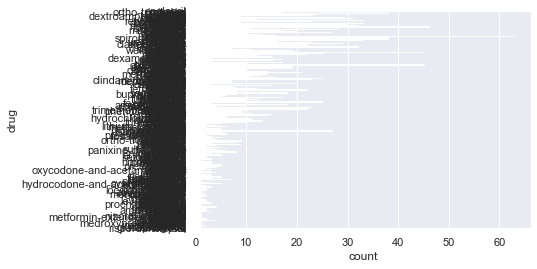

In [52]:
sns.countplot(data=train_data, y='drug')